In [1]:
#import layers and create the model 
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense 
from keras.models import Sequential 
model = Sequential() 
model.add(Convolution2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(64,64,3)),) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(units=128,activation='relu')) 
model.add(Dense(units=1,activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [3]:
#load the dataset and train the model
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'C:/Users/Dell/Documents/mlops-ws/mask_detection-master/mask_face_own/training_set',
        target_size=(64, 64),
        batch_size=1,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'C:/Users/Dell/Documents/mlops-ws/mask_detection-master/mask_face_own/test_set',
        target_size=(64, 64),
        batch_size=1,
        class_mode='binary')
model.fit(
        training_set,
        steps_per_epoch=686,
        epochs=3,
        validation_data=test_set,
        validation_steps=800)

model.save('my_cnn_model.h5')


Found 1376 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.
Epoch 1/3
686/686 [==============================] - 25s 37ms/step - loss: 0.5749 - accuracy: 0.7799 - val_loss: 0.1195 - val_accuracy: 0.9663
Epoch 2/3
686/686 [==============================] - 26s 38ms/step - loss: 0.1630 - accuracy: 0.9388 - val_loss: 0.1190 - val_accuracy: 0.9650
Epoch 3/3
686/686 [==============================] - 25s 36ms/step - loss: 0.1766 - accuracy: 0.9431 - val_loss: 0.1007 - val_accuracy: 0.9650


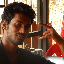

In [13]:
from keras.preprocessing import image
test_image=image.load_img('C:/Users/Dell/Documents/mlops-ws/mask_detection-master/mask_face_own/prediction/7.jpg', target_size=(64,64))
test_image

In [14]:
type(test_image)

PIL.Image.Image

In [15]:
test_image=image.img_to_array(test_image)
type(test_image)

numpy.ndarray

In [16]:
import numpy as np
test_image=np.expand_dims(test_image,axis=0)
test_image.shape

(1, 64, 64, 3)

In [17]:
res = model.predict(test_image)

In [18]:
res

array([[1.]], dtype=float32)

In [19]:
r = training_set.class_indices

In [20]:
r

{'with_mask': 0, 'without_mask': 1}

In [21]:
if res[0][0]==1:
    print('without mask')
else:
    print('with mask')

without mask
